## Customer segmentation using KMeans Clustering 

In this notebook we are working with a Mall data downloaded from https://www.kaggle.com/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python for classifying the customers into segments for different business purposes. We are using matplotlib and seaborn to visualie the data. We have used StandardScalar to scale the data for better performence of the model. 

Before applying the KMeans we used Elbow method to find out the optimal number of clusters with their respective plots. Then, we have used Silhouette Score to find out the accuracy of different number of clusters.

After above steps, we have applied KMeans clustering on the transformed dataset. After getting clusters for the data, we have ploted the data into individual clusters based on 'Annual Income' and 'Annual Income' features along with their centeroids, with the help of matplotlib. We also ploted the same with the help of seaborn library. 

In [217]:
import pandas as pd

df=pd.read_csv("Mall_Customers.csv")

In [219]:
df.head(5)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


<AxesSubplot:xlabel='Gender', ylabel='count'>

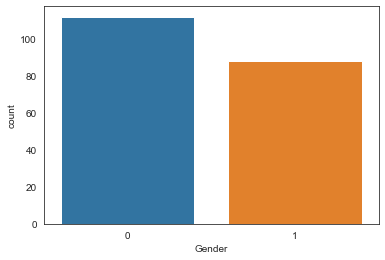

In [105]:
import matplotlib.pyplot as plt
import seaborn as sns


df.loc[df['Gender']=='Male', 'Gender']=1
df.loc[df['Gender']=='Female', 'Gender']= 0
df.set_index('CustomerID')

#total number of guest based on gender
sns.countplot(x='Gender',data=df)


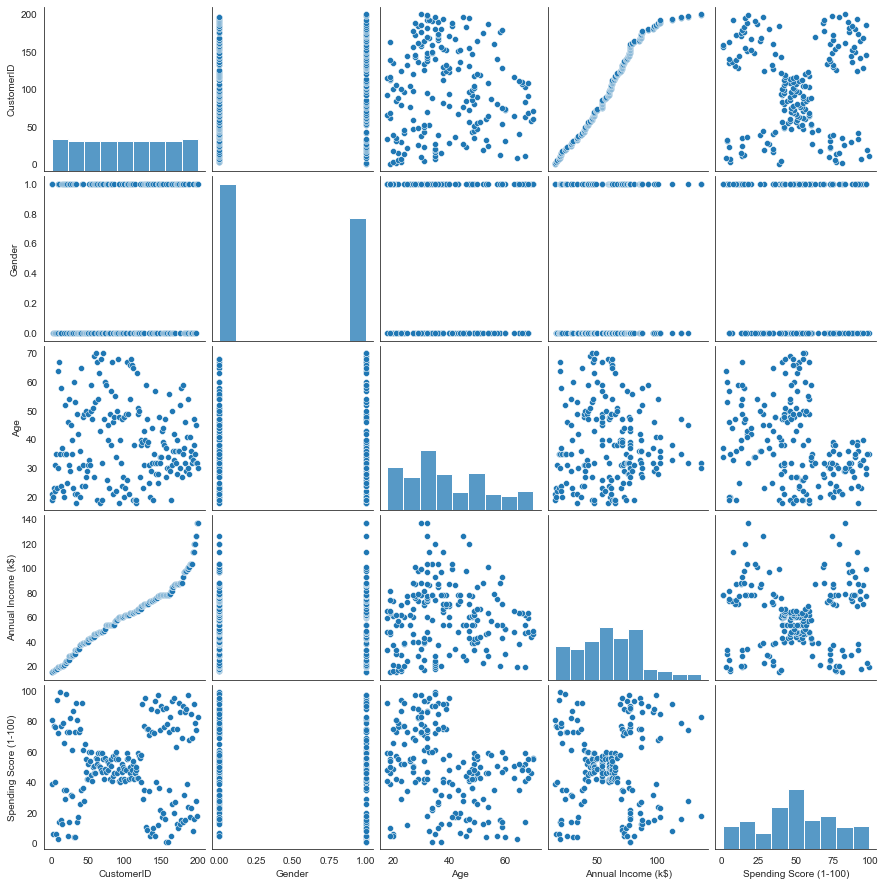

In [108]:
sns.pairplot(df)

In [109]:
#Scaling data with standard scaler

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(df)
features = scaler.transform(df)
dff=pd.DataFrame(features, columns=df.columns)

In [111]:
dff.drop(['CustomerID', 'Gender'], axis=1, inplace=True)

In [112]:
dff

,Age,Annual Income (k$),Spending Score (1-100)
0,-1.424569,-1.738999,-0.434801
1,-1.281035,-1.738999,1.195704
2,-1.352802,-1.700830,-1.715913
3,-1.137502,-1.700830,1.040418
4,-0.563369,-1.662660,-0.395980
...,...,...,...
195,-0.276302,2.268791,1.118061
196,0.441365,2.497807,-0.861839
197,-0.491602,2.497807,0.923953
198,-0.491602,2.917671,-1.250054


In [113]:
dff['Gender']=df['Gender']

In [133]:
#using elbow menthod to find the optimal number of clusters
#using silhouette_score to meansure the accuracy of number of clusters

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

lose = []
silhouette=[]

for cluster in range(2,10):
    kmeans = KMeans(n_jobs = -1, n_clusters = cluster, init='k-means++')
    kmeans.fit(dff)
    lose.append(kmeans.inertia_)
    silhouette.append(silhouette_score(dff, kmeans.labels_, metric='euclidean'))

df_cluster=pd.DataFrame({'cluster':range(2,10), 'lose':lose})  

df_sil=pd.DataFrame({'cluster':range(2,10), 'silhouette_score':silhouette})


# converting the results into a dataframe and plotting them

C:\ProgramData\lib\site-packages\sklearn\cluster\_kmeans.py:793: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  " removed in 1.0 (renaming of 0.25).", FutureWarning)
C:\ProgramData\lib\site-packages\sklearn\cluster\_kmeans.py:793: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  " removed in 1.0 (renaming of 0.25).", FutureWarning)
C:\ProgramData\lib\site-packages\sklearn\cluster\_kmeans.py:793: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  " removed in 1.0 (renaming of 0.25).", FutureWarning)
C:\ProgramData\lib\site-packages\sklearn\cluster\_kmeans.py:793: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  " removed in 1.0 (renaming of 0.25).", FutureWarning)
C:\ProgramData\lib\site-packages\sklearn\cluster\_kmeans.py:793: FutureWarning: 'n_jobs' was deprecated in v

Text(0.5, 1.0, 'Elbow Method')

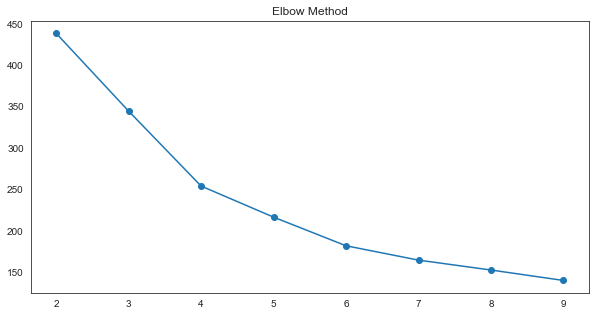

In [223]:
plt.figure(figsize=(10,5))
plt.plot(df_cluster.cluster, df_cluster.lose, marker="o")
plt.title('Elbow Method')

Text(0, 0.5, 'silhouette_score')

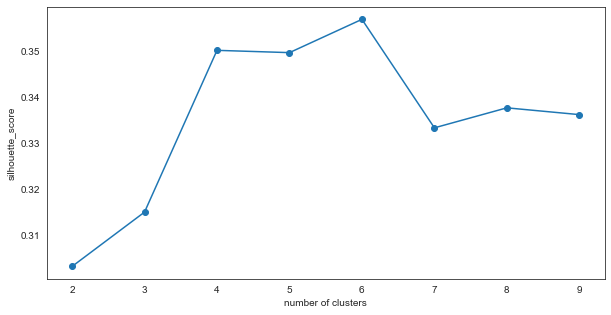

In [222]:
# Silhouette_score for different number of clusters 

plt.figure(figsize=(10,5))
plt.plot(df_sil.cluster, df_sil.silhouette_score, marker="o")
plt.xlabel("number of clusters")
plt.ylabel("silhouette_score")

In [200]:
# Apply k-means clustering to the full dataset
km = (KMeans(n_clusters = 4, init='k-means++', random_state= 50))
km.fit(dff)
all_labels = km.labels_
all_centroids = km.cluster_centers_

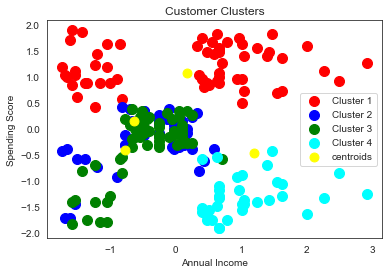

In [215]:
#Visualising the clusters
plt.scatter(dff[all_labels==0]['Annual Income (k$)'], dff[all_labels==0]['Spending Score (1-100)'], s = 100,c = 'red', label = 'Cluster 1')
plt.scatter(dff[all_labels==1]['Annual Income (k$)'], dff[all_labels==1]['Spending Score (1-100)'], s = 100,c = 'blue', label = 'Cluster 2')
plt.scatter(dff[all_labels==2]['Annual Income (k$)'], dff[all_labels==2]['Spending Score (1-100)'], s = 100,c = 'green', label = 'Cluster 3')
plt.scatter(dff[all_labels==3]['Annual Income (k$)'], dff[all_labels==3]['Spending Score (1-100)'], s = 100,c = 'cyan', label = 'Cluster 4')
#plt.scatter(dff[all_labels==4]['Annual Income (k$)'], dff[all_labels==4]['Spending Score (1-100)'], s = 100,c = 'yellow', label = 'Cluster 5')
#plt.scatter(dff[all_labels==5]['Annual Income (k$)'], dff[all_labels==5]['Spending Score (1-100)'], s = 100,c = 'black', label = 'Cluster 6')

#plt.scatter(km.cluster_centers_, s = 300, c = 'yellow', label = 'centroids')
plt.scatter(all_centroids[:,0] , all_centroids[:,1] , s = 80, c = 'yellow', label = 'centroids')
plt.title('Customer Clusters')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.show()

<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

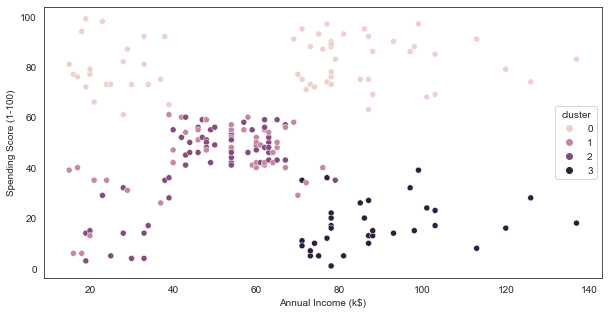

In [216]:
plt.figure(figsize=(10,5))
sns.scatterplot(data=df,x="Annual Income (k$)",y = "Spending Score (1-100)",hue="cluster")

In [202]:
df=pd.read_csv("Mall_Customers.csv")
df['cluster']=pd.DataFrame(all_labels)
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
0,1,Male,19,15,39,1
1,2,Male,21,15,81,0
2,3,Female,20,16,6,1
3,4,Female,23,16,77,0
4,5,Female,31,17,40,1
...,...,...,...,...,...,...
195,196,Female,35,120,79,0
196,197,Female,45,126,28,3
197,198,Male,32,126,74,0
198,199,Male,32,137,18,3


In [203]:
df.drop(['CustomerID'], axis=1, inplace=True)

In [204]:
avg_df = df.groupby(['cluster'], as_index=False).mean()
#avg_df.sort_values(by=['Annual Income (k$)'], ascending=True).reset_index().drop('index', axis=1)

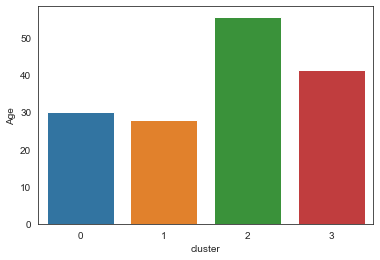

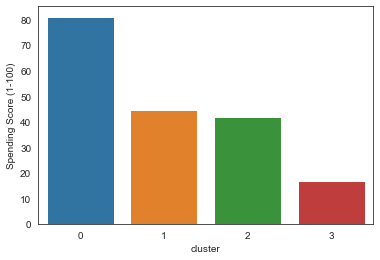

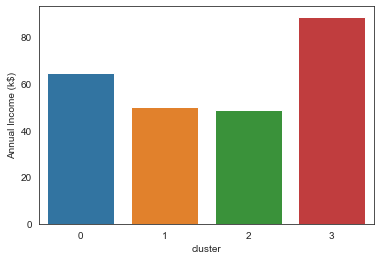

In [205]:
sns.barplot(x='cluster',y='Age',data=avg_df)
plt.show()
sns.barplot(x='cluster',y='Spending Score (1-100)',data=avg_df)
plt.show()
sns.barplot(x='cluster',y='Annual Income (k$)',data=avg_df)
plt.show()